In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, BatchNormalization, Dropout, MaxPooling1D

np.random.seed(42)

### Import Data

In [2]:
file_name = './dataset/feature_sel.csv'
df = pd.read_csv(file_name)

In [9]:
df.year = pd.to_datetime(df.year) 
df = df.dropna().drop_duplicates()
df.name = df.name.apply(lambda row: row.split('.')[-1])
df = df.drop(axis=1, columns=['Unnamed: 0'])
print(f'df shape: {df.shape}'); print(f'df cols: {df.columns}')

df shape: (314, 27)
df cols: Index(['name', 'juristicid', 'year', 'accountreceivable', 'accountpayable',
       'totalnoncurrentliability', 'totalliability', 'totalcurrentliability',
       'totalcurrentasset', 'totalasset', 'totalexpense',
       'cashandcashequivalent', 'otherincome', 'totalrevenue', 'netprofitloss',
       'pct_accountreceivable', 'pct_accountpayable',
       'pct_totalnoncurrentliability', 'pct_totalliability',
       'pct_totalcurrentliability', 'pct_totalcurrentasset', 'pct_totalasset',
       'pct_totalexpense', 'pct_cashandcashequivalent', 'pct_otherincome',
       'pct_totalrevenue', 'pct_netprofitloss'],
      dtype='object')


Use ptt as mocking data

In [26]:
df_ptt = df[df.juristicid == 107535000206]
df_ptt.index = df_ptt.year
df_ptt = df_ptt.drop(axis=1, columns=['year'])

#### visualization

C:\Users\hp\AppData\Local\Temp\ipykernel_10436\1066328727.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(12, 5))


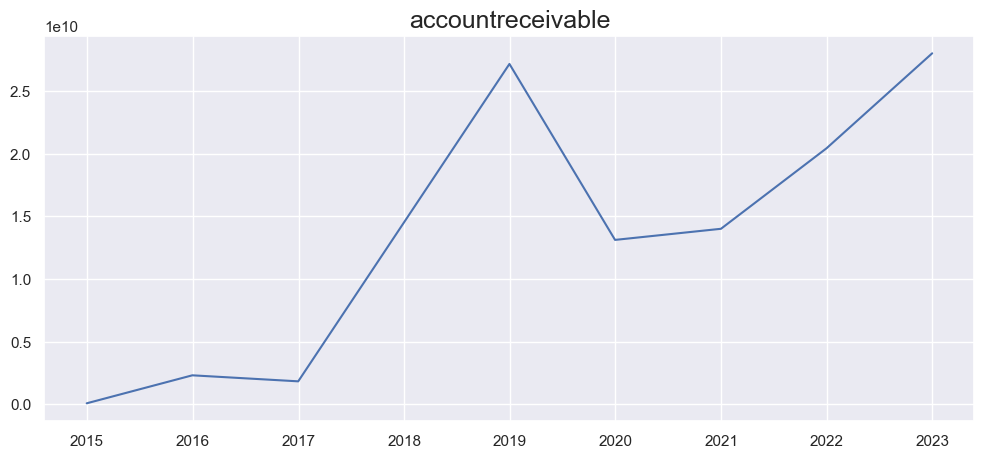

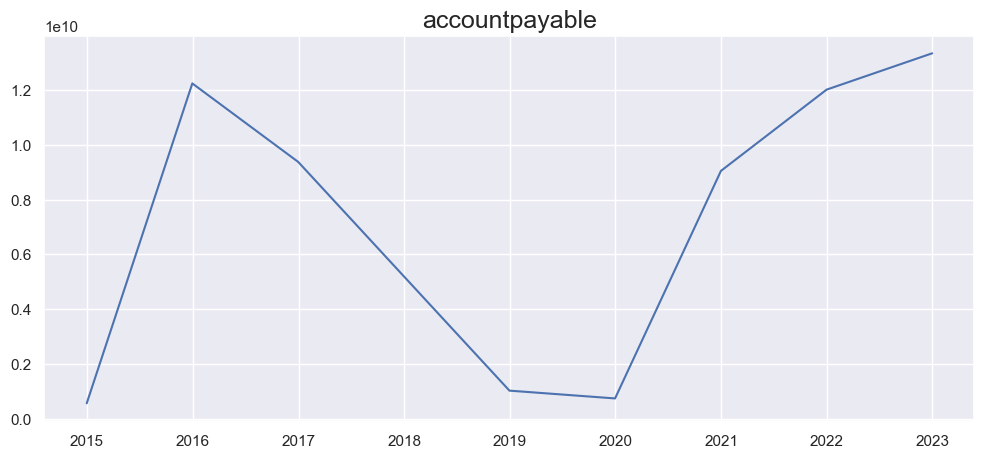

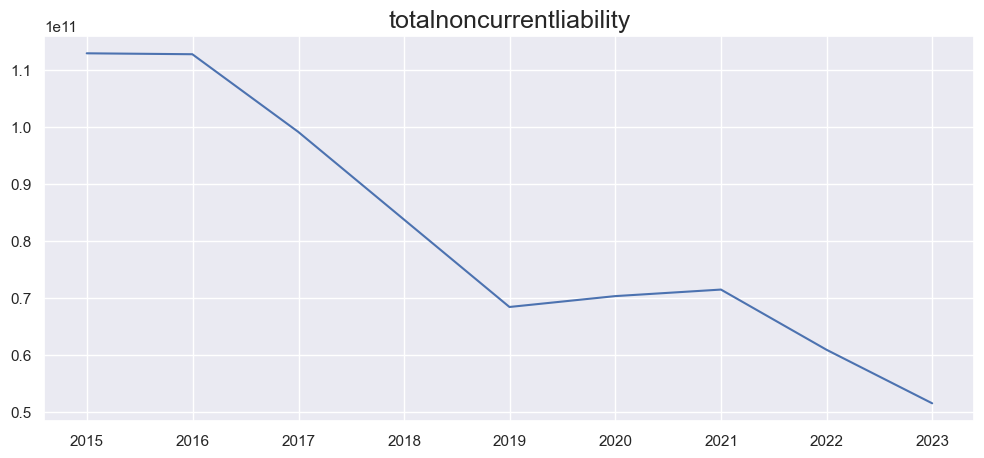

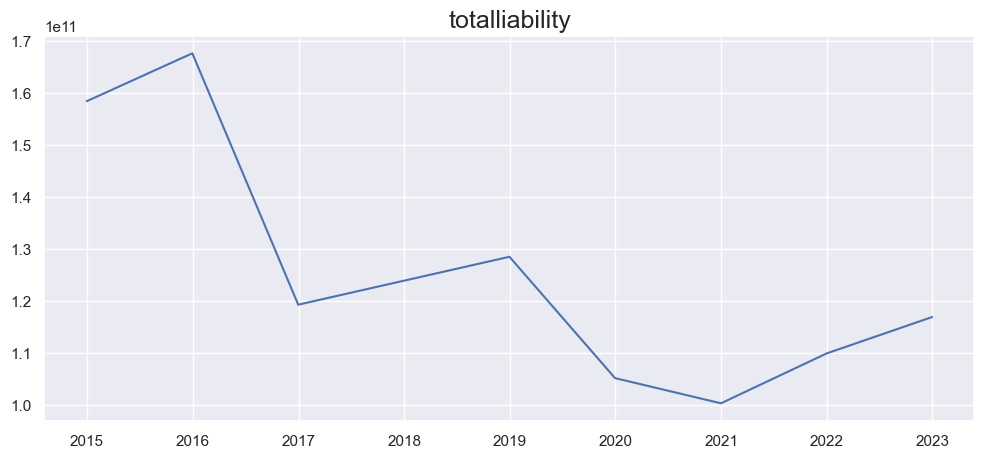

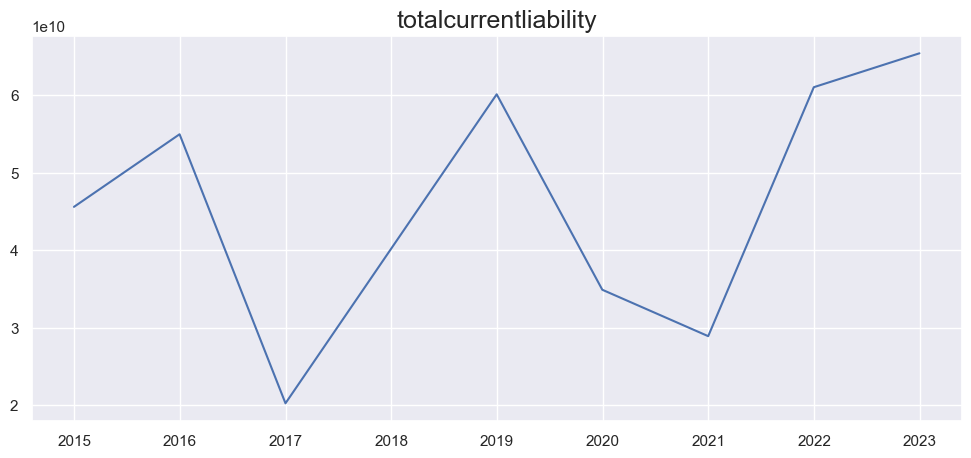

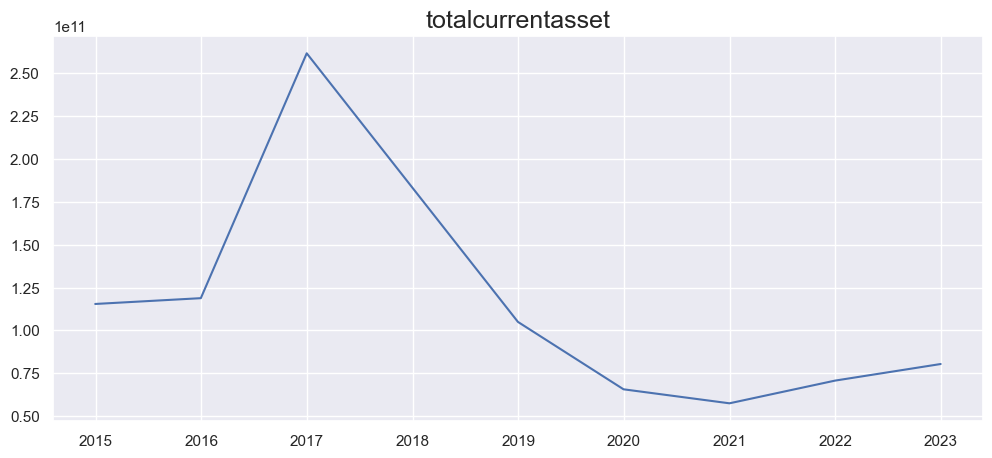

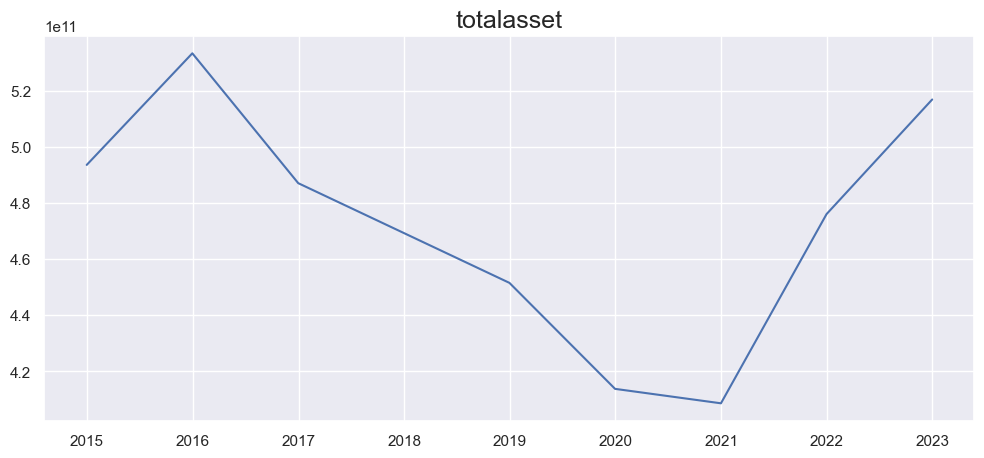

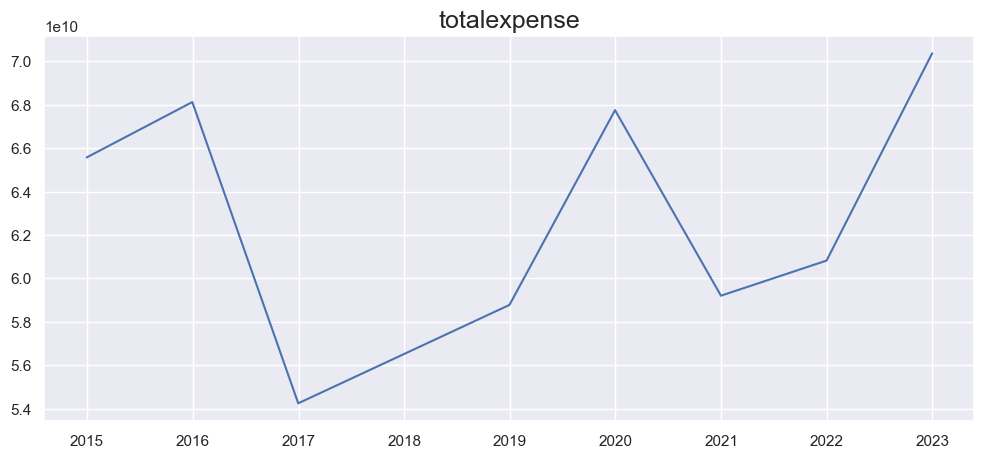

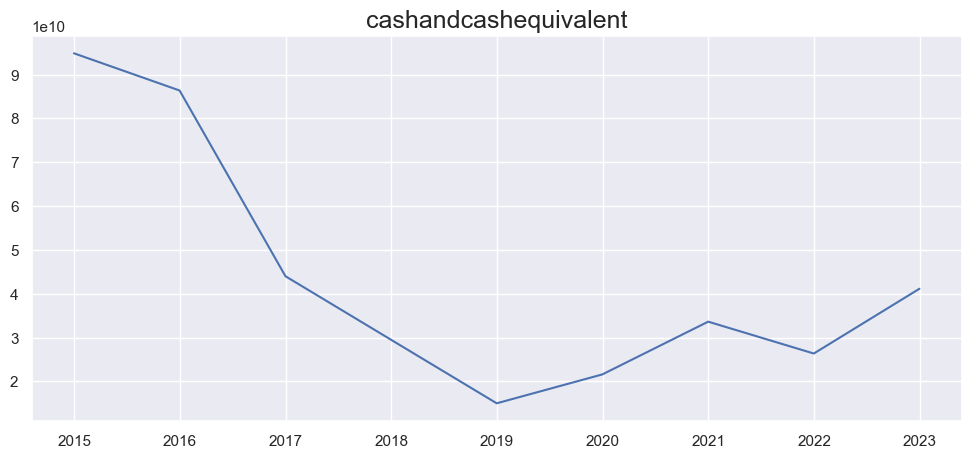

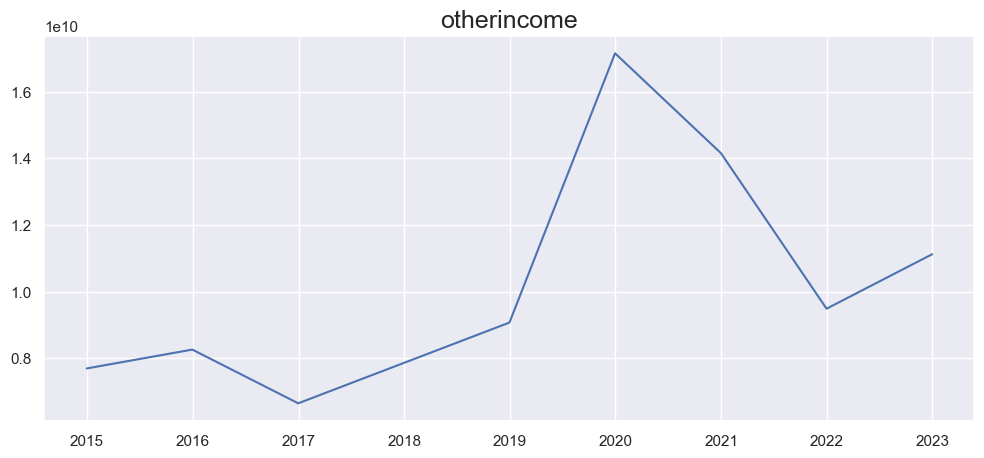

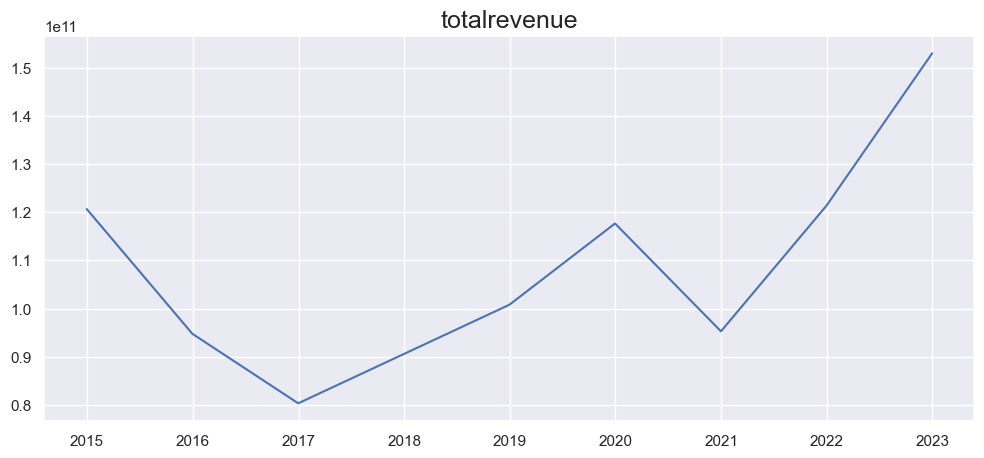

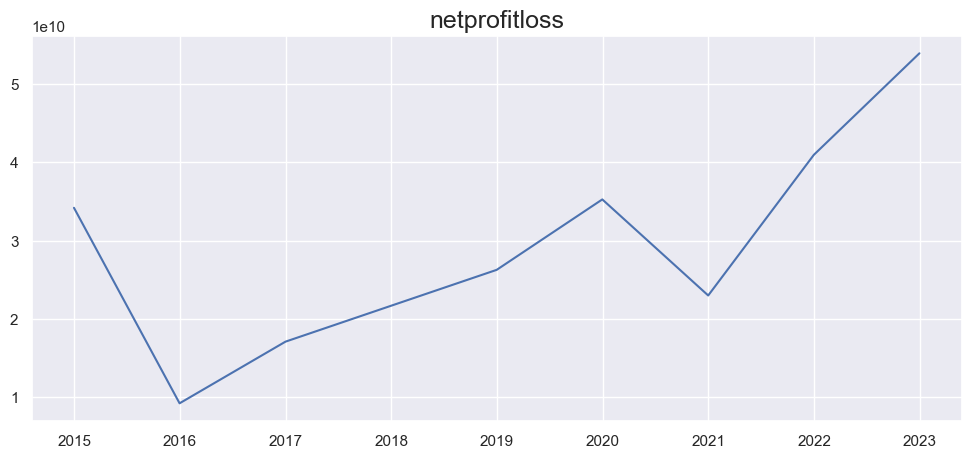

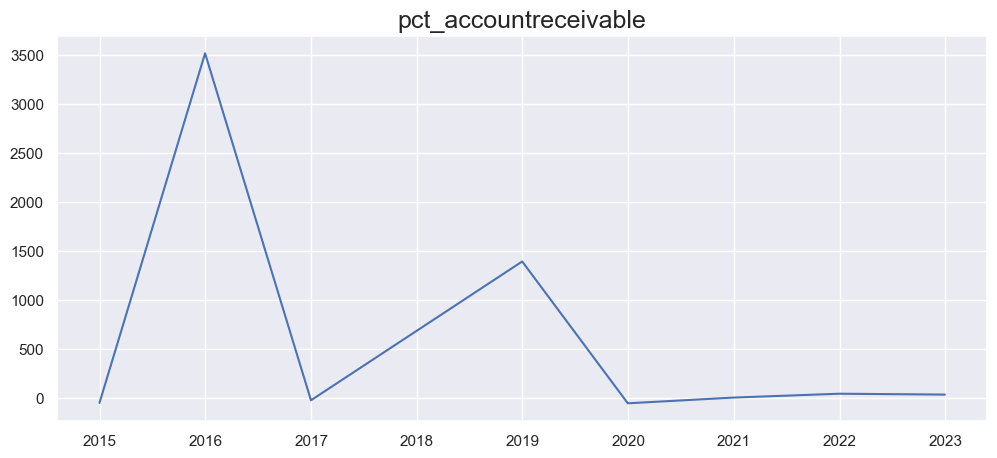

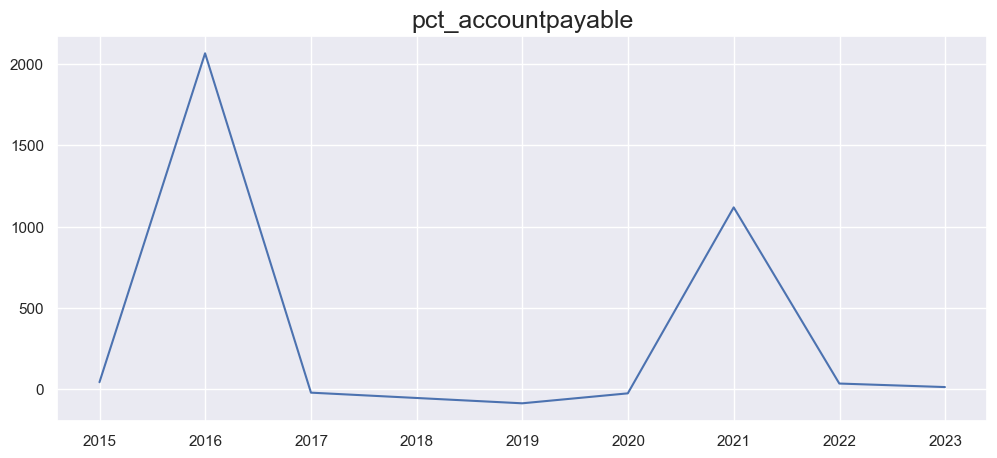

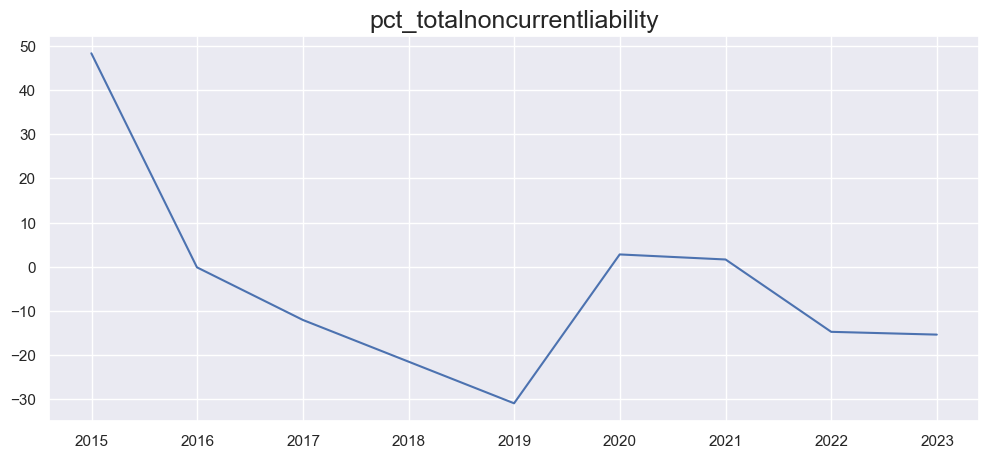

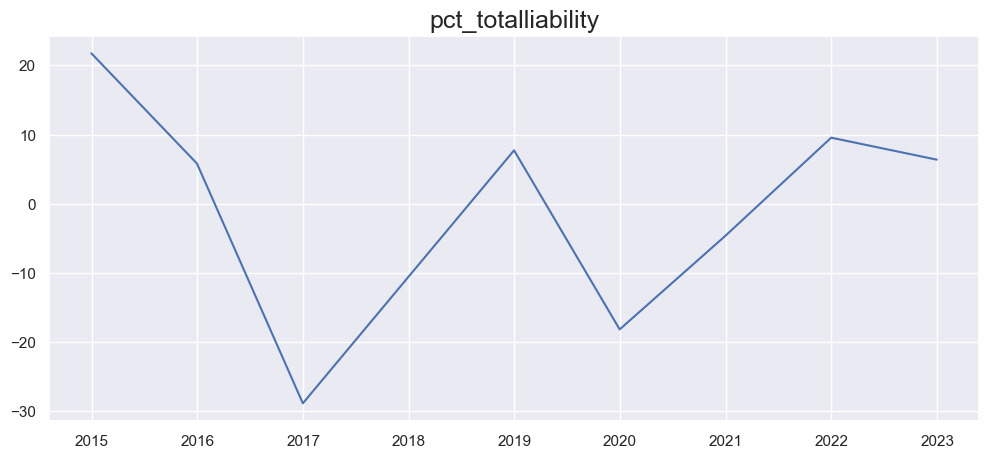

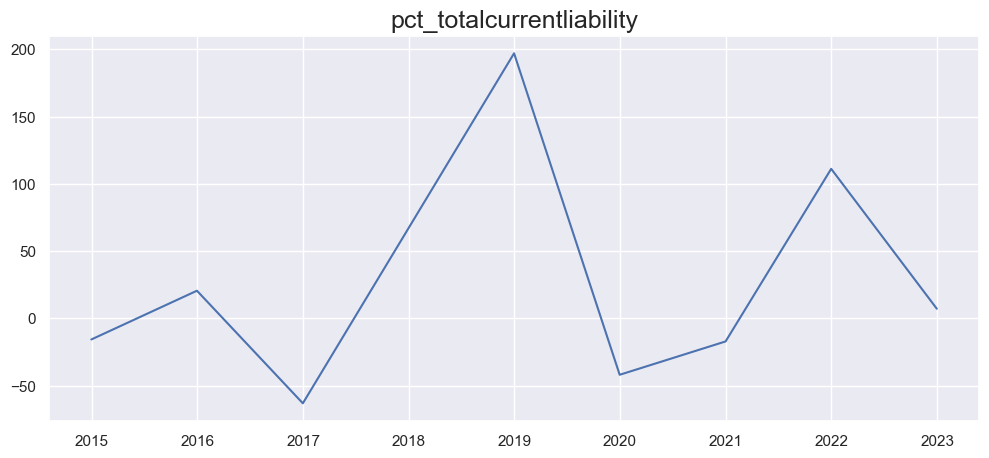

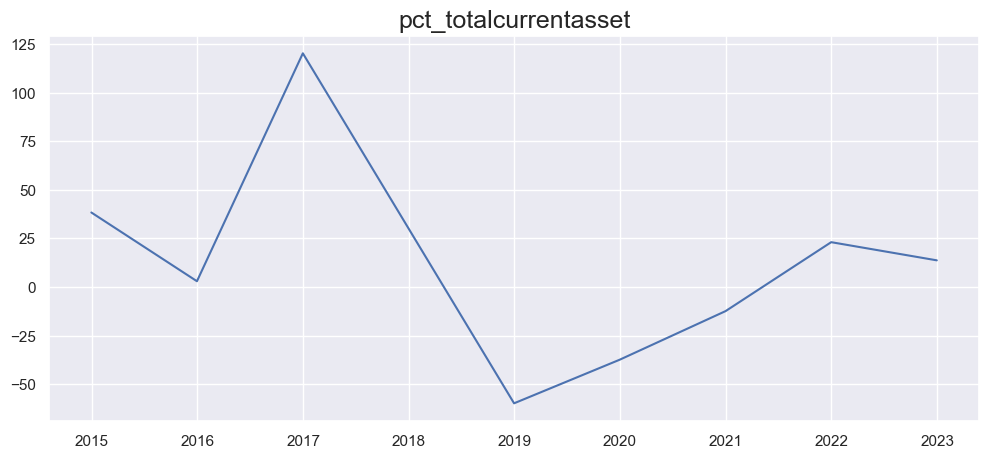

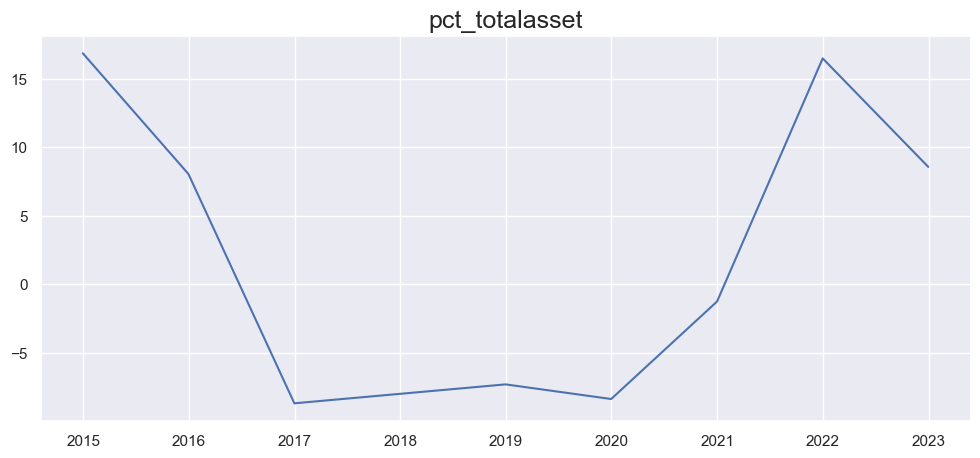

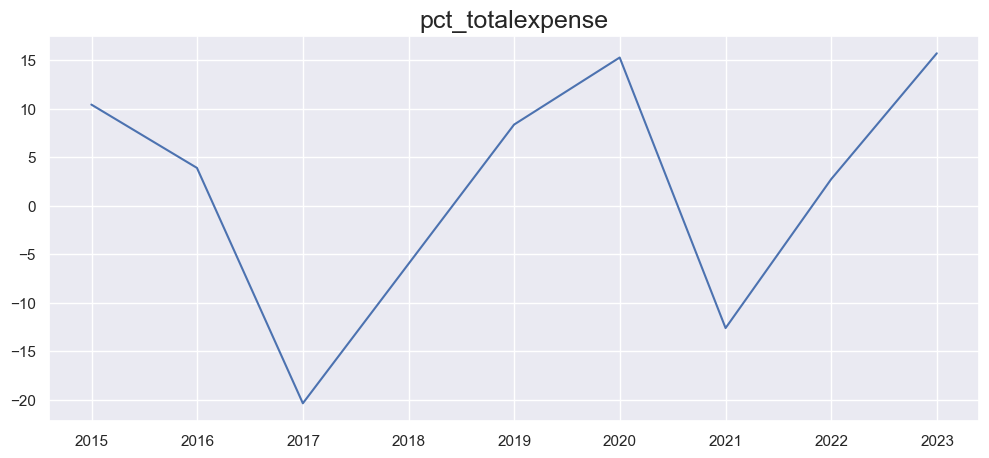

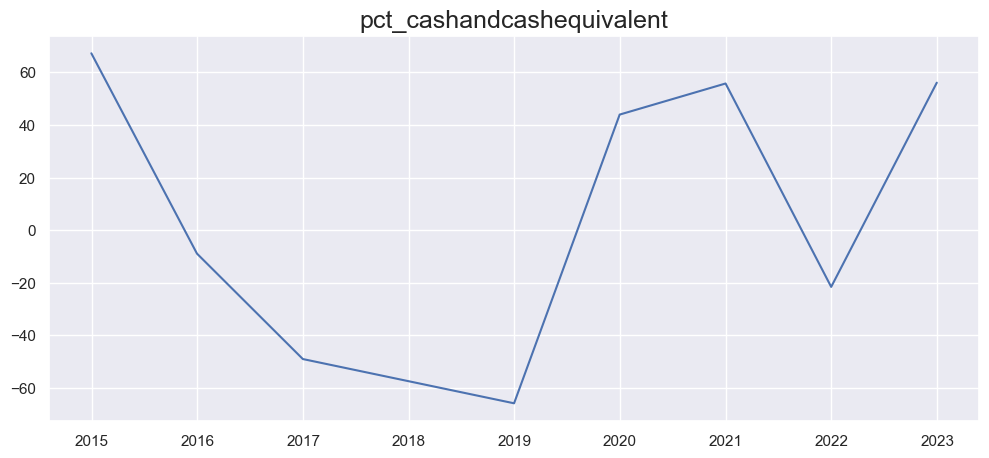

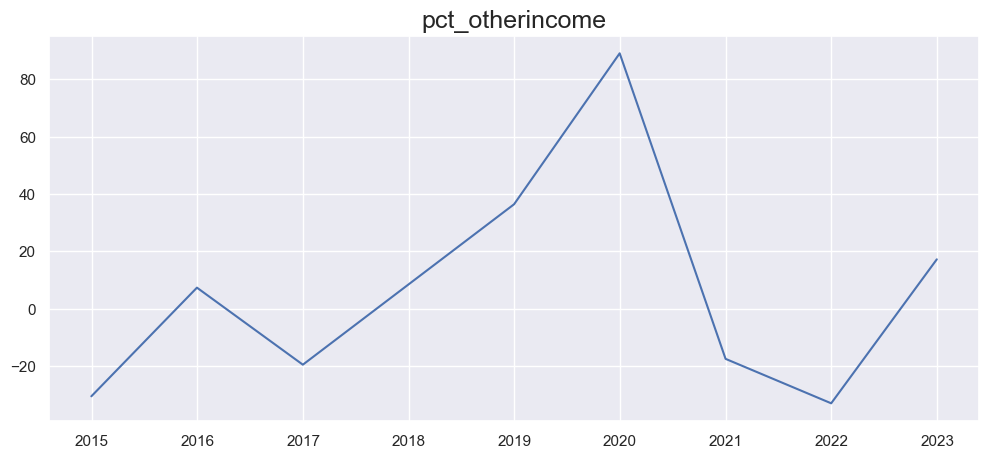

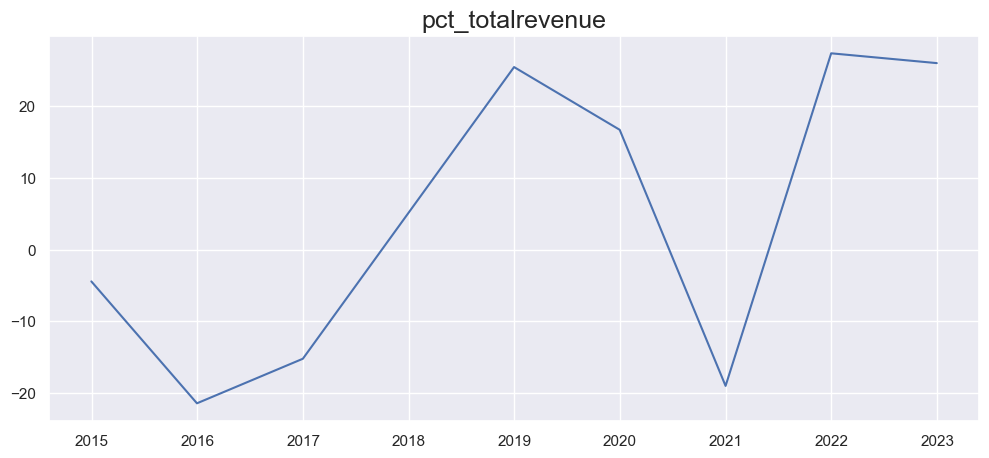

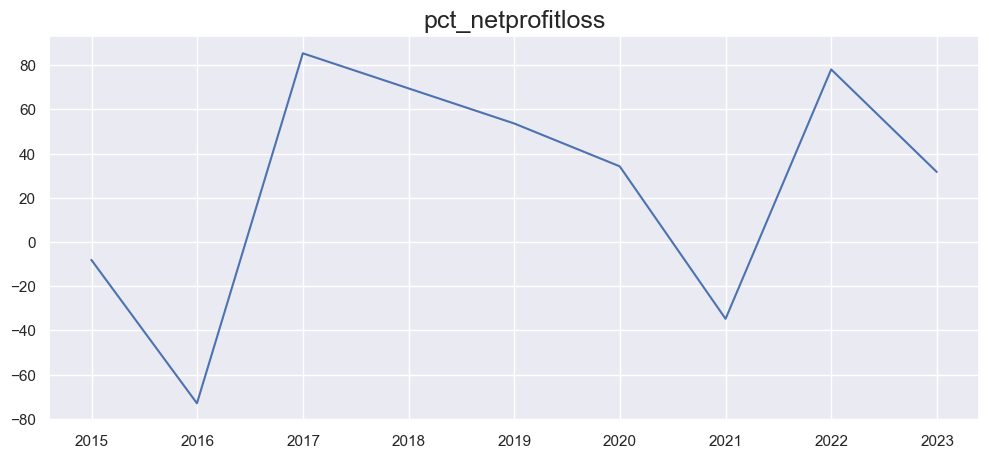

In [33]:
for feature in [col for col in df_ptt.columns if col not in ['name', 'juristicid']]:
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(df_ptt[feature].T);
    ax.set_title(feature, fontsize=18)

plt.show()

#### clean

In [37]:
df_ptt = df_ptt.drop(axis=1, columns=['name', 'juristicid',
                                      'accountreceivable', 'accountpayable', 'totalnoncurrentliability', 'totalliability',
                                      'totalcurrentliability', 'totalcurrentasset', 'totalasset', 'totalexpense',
                                      'cashandcashequivalent', 'otherincome', 'totalrevenue', 'netprofitloss'])

In [38]:
X_df_ptt = df_ptt.iloc[:7]
y_df_ptt = df_ptt.iloc[7]

In [96]:
X = np.array(X_df_ptt)[np.newaxis].T
y = np.array(y_df_ptt)[np.newaxis].T

In [98]:
X.shape, y.shape

((12, 7, 1), (12, 1))

## FNet

LSTM

In [146]:
n_input = 7

model = Sequential()

model.add(tf.keras.Input(shape=(n_input, 1)))

model.add(Conv1D(filters=1, kernel_size=1, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.2))

model.add(LSTM(32,))
model.add(Dense(1, activation='leaky_relu'))

opt = keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=opt, loss='mean_squared_error')

model.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_44 (Conv1D)              │ (None, 7, 1)           │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 7, 1)           │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_43 (MaxPooling1D) │ (None, 7, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 7, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,391 (17.15 KB)

 Trainable params: 4,389 (17.14 KB)

 Non-trainable params: 2 (8.00 B)

In [147]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


array([[-0.08327398],
       [-0.1082567 ],
       [ 0.2889671 ],
       [ 0.09008717],
       [-0.12381587],
       [-0.05978138],
       [-0.04159462],
       [ 0.1244538 ],
       [ 0.290212  ],
       [ 0.207156  ],
       [-0.0702843 ],
       [-0.10527438]], dtype=float32)

In [149]:
model.evaluate(X, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 620.4527


620.4526977539062